# 데이터 다운로드 및 분석

In [4]:
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

In [5]:
import os
path_to_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko'

with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

print("Data Size:", len(raw))

print("Example:")
for sen in raw[0:100][::20]: print(">>", sen)

Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60


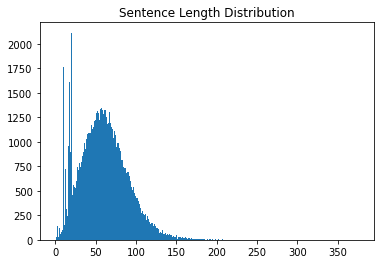

In [6]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=int)

for sen in raw:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

### 공백, 특수문자 포함 , 음절의 수가 n인 문장 or 단어

In [7]:
def check_sentence_with_length(raw, length):
    count = 0
    
    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: 
                return
# end of check_sentence_with_length

n = 5

### 공백, 특수문자 포함 , 음절의 수가 1인 문장 or 단어
check_sentence_with_length(raw, n)

11.지각
면접 이후
-남자들-
*산부인과
*심장질환
햇볕 쬐기
7. 지압
세부사항:
세부사항:
세부사항:
배신자!”
▲레스토랑
▲버스투어
“나중에”
나를 봐"
분열 조장
문화·연예
문화·연예
문화·연예
문화·연예
인권 침해
산업자원부
해외 송금
산업자원부


In [8]:
for idx, _sum in enumerate(sentence_length):
    ## 1500 은 뭐야?
    # 문장의 수가 1500을 초과하는 문장 길이를 추출합니다.  <------- 의미 해깔리게 함. 강의 작성자는 음절 포함 특수문자 공백의 수를 문장의 길이라 정의 함
    ## (위 주석 정정) 공백, 특수문자 ,포함 된 음절의 갯수를 문장의 길이라 정의 했음.
    if _sum > 2000:
        print("Outlier Index:", idx+1)

Outlier Index: 21


위에서 찾은 outlier index 중 하나인, 길이가 11인 문장들은 어떤 것들이 있는지 확인

In [9]:
check_sentence_with_length(raw, 21)

미국과 영국의 과학자들이 악수를 했다.
인력은 기계에 의해 보강되어야만 했다.
"시장은 그들에게 넓게 열려 있습니다.
아디다스는 또 다른 이점도 갖고 있다.
공부를 위해서만 이용하겠다고 말입니다.
환경법규의 도입은 고통스러운 과정이다.
- 여보, 이쪽이야, 아니면 저쪽이야?
인도는 훨씬 늦게 게임에 뛰어 들었다.
요즘 대부분의 기업들이 그렇지 않은가?
카리스마적인 지도자들은 위험을 즐긴다.
우리가 하려고 하는 일의 모델은 없다.
정상 회담은 오늘 늦게 끝날 것입니다.
그리고 공화당의 추정은 절반만 맞았다.
하지만 증가하고 있는 노인 인구수에따라
민간부문에서 그런 일을 할 수는 없다고
금년초 이라크 정보부는 "사담 후세인:
실제로 이 방법은 만족스럽지가 못하다.
카자흐스탄으로부터 중국으로 입국하려다가
클립퍼 칩에 대한 이야기로 들어 가자.
북한의 무기 개발에 대한 CIA 보고서
어려움을 겪고 있는 멕시코 경제에 대한
그는 ''미국은 우리의 최악의 적이다.
수로가 오염되고 야생동물이 밀렵되었다.
이런 지역들을 보살피고 보호해야 한다.
학습 방법은 훨씬 더 흠칫한 것입니다.
포옹은 심장에 좋은 약 일 수 도 있다
(경찰은 심문을 위해 그를 구금했다.)
금년에는 이 숫자가 58%로 증가했다.
(금고를 뒤져 많은 서류를 가져갔다.)
김치는 열량은 적고 비타민은 풍부하다.
smear campaign (흑색선전)
아들은 아버지로부터 사업을 이어받는다.
그것은 한계 효과가 나타나는 시기이다.
"사람들에게 선택권이 주어져야 합니다.
로야 저가는 임시 의사 결정 집단이다.
160석이 여성 대표들에게 보장되었다.
걷기 용으로 고안된 신발이 가장 좋다.
이것을 일주일에 5번 정도 해야 한다.
해외 판권은 이미 16개국에서 팔렸다.
그리고 나는 이렇게 엄숙히 서약합니다:
하지만 오늘의 주제를 그는 알것입니다:
(그 사건들은 전쟁 발발로 발전했다.)
"그는 정말로 국민들을 실망시켰습니다.
"제국의 반격"과 새 영화 "스타워즈:
남북간 해상 교전으로 남한 경비정 침몰
공룡들은 필연적으로

 중복 제거는 Python의 기본 자료형 set을 활용할 겁니다. set은 집합을 정의하는 자료형인데, 중복을 허용하지 않아 변환 과정에서 자동으로 중복된 요소를 제거해 주거든요! 대신 list의 순서가 뒤죽박죽될 수 있으니, 만약 번역 데이터처럼 쌍을 이뤄야 하는 경우라면 주의해서 사용하셔야 합니다!

중복을 제거한 후, 앞에서 분포를 확인한 소스를 다시 실행시켜 보겠습니다!

Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


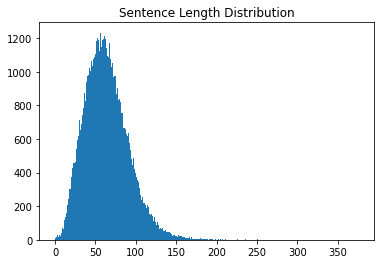

In [10]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

이제서야 깔끔한 데이터를 얻은 느낌이 드네요. 데이터의 개수도 17000개 가량 줄어 77591개가 되었습니다.

마지막으로 '모든 데이터를 다 사용할 것이냐' 가 문제인데, 후에 미니 배치를 만들 것을 생각하면 모든 데이터를 다 사용하는 것은 연산 측면에서 비효율적입니다. 미니 배치 특성상 각 데이터의 크기가 모두 동일해야 하기 때문에 가장 긴 데이터를 기준으로 Padding 처리를 해야 합니다. 위의 데이터에서 만약 길이가 100인 문장까지만 사용한다면 데이터는 [ (77591 - 길이 100 초과 문장 수) x 100 ] 의 형태를 갖겠지만 모두 사용할 경우 [ 77591 x 377 ] 로 전자보다 최소 3.7배 큰 메모리를 차지합니다. 학습 시간도 그만큼 더 오래 걸리고요.

길이별로 정렬하여 미니 배치를 구성해 Padding을 최소화하는 방법도 있지만 이는 데이터를 섞는 데 편향성이 생길 수 있으므로 지양해야 합니다. 여기서는 길이 150 이상의 데이터를 제거하고 사용하도록 할게요!

그리고 앞서 확인한 것처럼 너무 짧은 데이터는 오히려 노이즈로 작용할 수 있습니다. 따라서 길이가 10 미만인 데이터도 제거하도록 하죠! 최종 데이터 분포도 함께 확인해봅시다.

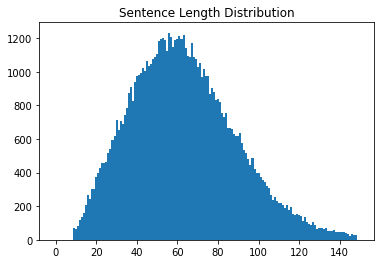

In [11]:
max_len = 150
min_len = 10

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

# 공백 기반 토큰화
정제된 데이터 filtered_corpus를 공백 기반으로 토큰화하여 리스트 split_corpus에 저장한 후, 아래 tokenize() 함수를 사용해 단어 사전과 Tensor 데이터를 얻으세요! 그리고 단어 사전의 크기를 확인

In [12]:
def tokenize(corpus):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer
# end of def tokenize

In [13]:
# 정제된 데이터 filtered_corpus를 공백 기반으로 토큰화하여 저장하는 코드를 직접 작성해 보세요.
split_corpus = []

for kor in filtered_corpus :
    split_corpus.append(kor.split())

단어 사전의 길이를 확인

In [14]:
split_tensor, split_tokenizer = tokenize(split_corpus)

print("Split Vocab Size:", len(split_tokenizer.index_word))

Split Vocab Size: 237435


In [16]:
for idx, word in enumerate(split_tokenizer.word_index):
    print(idx, ":", word)

    if idx > 10: break

0 : 이
1 : 밝혔다.
2 : 있다.
3 : 말했다.
4 : 수
5 : 있는
6 : 그는
7 : 대한
8 : 위해
9 : 전했다.
10 : 지난
11 : 이번


In [17]:
split_tokenizer

In [18]:
split_tensor

array([[   270,      7,   2584, ...,      0,      0,      0],
       [    23,      1,  83716, ...,      0,      0,      0],
       [  7072,  30597,   1276, ...,      0,      0,      0],
       ...,
       [237428, 237429,  45448, ...,      0,      0,      0],
       [237432,   7754,   9432, ...,      0,      0,      0],
       [   159,   1002,     38, ...,      0,      0,      0]], dtype=int32)

# 형태소 기반 토큰화
한국어 형태소 분석기
* Khaiii
* KoNLPy

이번 코스에서는 KoNLPy, 그중에서도 가장 성능이 준수한 MeCab클래스를 활용해 실습하도록 하겠습니다!

In [23]:
!pip install python-mecab-ko

     |████████████████████████████████| 578 kB 3.9 MB/s            
     |████████████████████████████████| 34.5 MB 62.0 MB/s            


In [28]:
# 위에서 사용한 코드를 활용해 MeCab 단어 사전을 만들어보세요. 
# Hint : mecab.morphs()를 사용해서 형태소분석을 합니다.
from konlpy.tag import Mecab

mecab = Mecab()


def mecab_split(sentence):
    return mecab.morphs(sentence)

mecab_corpus = []

for kor in filtered_corpus:
    mecab_corpus.append(mecab_split(kor))

In [30]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)

print("MeCab Vocab Size:", len(mecab_tokenizer.index_word))

MeCab Vocab Size: 52279


* 한국어를 처리할 때는 공백 기반 토큰화를 절대 피할 것

두 가지 방법으로 mecab_tensor[100] 을 원문으로 되돌려 보세요!
(여기서 띄어쓰기는 고려하지 않습니다!)

In [31]:
# Case 1
texts = mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])
print(texts[0])

한편 유로 2008 결승전 이 열린 에른스트 하펠 스타디움 에 는 5 만 명 에 달하 는 양국 을 응원 하 는 관중 들 이 입장 했으며 빈 도심 의 광장 에 도 7 만 명 의 축구 팬 들 이 모여 대형 스크린 을 통해 경기 를 관람 했 다 .


In [32]:
# Case 2
sentence = ""

for w in mecab_tensor[100]:
    if w == 0: continue
    sentence += mecab_tokenizer.index_word[w] + " "

print(sentence)

한편 유로 2008 결승전 이 열린 에른스트 하펠 스타디움 에 는 5 만 명 에 달하 는 양국 을 응원 하 는 관중 들 이 입장 했으며 빈 도심 의 광장 에 도 7 만 명 의 축구 팬 들 이 모여 대형 스크린 을 통해 경기 를 관람 했 다 . 
